<a href="https://colab.research.google.com/github/Hitansh159/match-filter/blob/main/Data_Genrator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links and speechs 

Modi: 

<hr>

tom scott: https://www.youtube.com/watch?v=OFRjZtYs3wY <br>
    time: 00:23:00 - 00:09:23 <br>
    duration: 00:09:00 <br>

  <hr>

mark brown : https://www.youtube.com/watch?v=vFjXKOXdgGo <br>
    time: 00:00:00 - 00:18:00 <br>
    duration: 00:18:00 <br>

<hr>


In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install youtube-dl

     |████████████████████████████████| 1.9 MB 29.6 MB/s 


In [ ]:
!youtube-dl -F https://www.youtube.com/watch?v=vFjXKOXdgGo

[youtube] vFjXKOXdgGo: Downloading webpage
[info] Available formats for vFjXKOXdgGo:
format code  extension  resolution note
249          webm       audio only tiny   50k , webm_dash container, opus @ 50k (48000Hz), 6.57MiB
250          webm       audio only tiny   66k , webm_dash container, opus @ 66k (48000Hz), 8.67MiB
251          webm       audio only tiny  127k , webm_dash container, opus @127k (48000Hz), 16.63MiB
140          m4a        audio only tiny  129k , m4a_dash container, mp4a.40.2@129k (44100Hz), 16.84MiB
160          mp4        256x144    144p   39k , mp4_dash container, avc1.4d400c@  39k, 30fps, video only, 5.17MiB
278          webm       256x144    144p   75k , webm_dash container, vp9@  75k, 30fps, video only, 9.88MiB
133          mp4        426x240    240p   79k , mp4_dash container, avc1.4d4015@  79k, 30fps, video only, 10.28MiB
242          webm       426x240    240p  113k , webm_dash container, vp9@ 113k, 30fps, video only, 14.73MiB
134          mp4        640x36

In [ ]:
!youtube-dl -f 251 https://www.youtube.com/watch?v=vFjXKOXdgGo

[youtube] vFjXKOXdgGo: Downloading webpage
[download] Destination: How I learned Unity in 3 simple_ steps-vFjXKOXdgGo.webm
[download] 100% of 16.63MiB in 04:54


In [ ]:
!ffmpeg -ss 00:00:00 -i How* -t 00:18:00 3.wav

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.60G/5.61G [01:53<00:00, 39.1MB/s]
100% 5.61G/5.61G [01:53<00:00, 53.2MB/s]


In [ ]:
# !cp -r ./drive/MyDrive/fold9 ./

In [ ]:
!unzip *.zip


In [ ]:
!rm -r background/

In [ ]:
!mkdir background 

In [ ]:
!cp -r ./fold*/* ./background

In [53]:
import librosa
import os
import random
import soundfile as sf
import pandas as pd
import numpy as np
import IPython
import matplotlib.pyplot as plt
import csv
import json

In [65]:

# TODO:: typos in docstring
class DataGenrator():
    """
        Class will be used to genrate dataset for different speakers

        Attributes: 
            dataset: it will store dataset genrated from last genrate call or None
            sample_rate: it will store sample rate of sound sapmle or None
    """
    dataset = pd.DataFrame()
    sample_rate = None


    def __init__(self, background_folder_path, speakers_folder_path):
        """
            Creates Data for training model from background noise and speakers audio

            Arguments:
            background_folder_path: Path to the folder containing background audio file with .wav format atleast of 10 sec length
            speaker_folder_path: Path to the folder containing speakers folder containg their audio with .wav format atleast of 2 sec length

            Return:
            Void
        """
        self._background_folder_path = background_folder_path
        self._speakers_folder_path = speakers_folder_path
        self._speakers = []
        for i in os.listdir(self._speakers_folder_path):
            if os.path.isdir(os.path.join(self._speakers_folder_path, i)):
                self._speakers.append(i)
        assert(len(self._speakers) != 0)

    def random_time_segment(self):
        """
            Generates random position where speaker clip will be imposed 

            Arguments:
                None
            return:
                time_segment: tuple of start and end index of time segment (start, end)
        """
        start = random.randint(0, self.sample_rate * 8)
        end = start + 2 * self.sample_rate
        return (start, end)

    def insert_clip(self, background, speaker, time_segment):
        """
            Inserts the speaker clip in bacground for given time segment

            Arguments:
                background: a 10 sec audio file converted to numpy array
                speaker: a 2 sec audio file converted to numpy array 
                time_segment: tuple of start and end index of time segment (start, end)
            Return:
                background: background clip with added speaker sound in clip duration
        """
        # print(len(background), len(speaker), time_segment[1]- time_segment[0])
        background[time_segment[0]:time_segment[1]] += speaker
        return background
    
    def insert_ones(self, y: list, time_segment: tuple, error_tolurance: int):
        """
            It will add 1 where speakers sound is present it will also plus error tolarnce

            Arguments:
                y: Ground truth list 
                time_segment: tuple of start and end index of time segment (start, end)
                error_tolurance: number of 1 to be added after speakers clip ends
            Returns:
                y: ground truth list with 1's added in time segment  
        """
        for i in range(time_segment[0], min(time_segment[1]+error_tolurance, self.sample_rate * 10)):
            y[i] = 1
        return y
    
    def generate_example(self, background, speaker, others):
        """
            It generates example for a given speaker, background and others

            Arguments:
                background(str): name of background file
                speaker(str): name of speaker
                others(list): name of other speaker
            Return:
                audio_clip: numpy array representing audio file
                y: ground truth 
        """
        y = [0 for i in range(self.sample_rate*10)]
        number_of_speaker_clips = random.randint(1, 3)
        number_of_other_speaker_clips = random.randint(0, 3) if others else 0

        speaker_clip_time_segments = [self.random_time_segment() for i in range(number_of_speaker_clips)]
        other_speaker_clip_time_segments = [self.random_time_segment() for i in range(number_of_other_speaker_clips)]

        speaker_clips = []
        for i in os.listdir(os.path.join(self._speakers_folder_path, speaker)):
          if i != '.ipynb_checkpoints':
            speaker_clips.append(i)
        #TODO:: to make code others clip appendable in background
        other_speaker_clips = []
        for other in others:
          for i in os.listdir(os.path.join(self._speakers_folder_path, other)):
            if i != '.ipynb_checkpoints':
              other_speaker_clips.append(f'{other}/{i}')

        
        speaker_clips = random.sample(speaker_clips, number_of_speaker_clips)
        other_speaker_clips = random.sample(other_speaker_clips, number_of_other_speaker_clips) 
        # print(speaker_clips)
        # print(other_speaker_clips)
        speaker_clips = [librosa.load(os.path.join(self._speakers_folder_path, speaker, i))[0][:2*self.sample_rate] for i in speaker_clips]
        other_speaker_clips = [librosa.load(os.path.join(self._speakers_folder_path, i))[0][:2*self.sample_rate] for i in other_speaker_clips]


        background, self.sample_rate = librosa.load(os.path.join(self._background_folder_path, background))

        if len(background) < 10*self.sample_rate:
          length = len(background) / self.sample_rate
          left = 10 - length
          repeat = int(left / length) + 1 
          extra = (left % length ) * self.sample_rate 

          background = np.tile(background, repeat)
          background = np.append(background, background[:int(extra) if extra else None]) 
          


        background = background[:10*self.sample_rate] * 0.5
        
        for i in range(number_of_other_speaker_clips):
          backgruond = self.insert_clip(background, other_speaker_clips[i], other_speaker_clip_time_segments[i])

        for i in range(number_of_speaker_clips):
            # print(f"start: {speaker_clip_time_segments[i][0]/self.sample_rate} end: {speaker_clip_time_segments[i][1]/self.sample_rate}")
            # print(f'speaker_clips: {len(speaker_clips[i])}, id: {i}')
            background = self.insert_clip(background, speaker_clips[i], speaker_clip_time_segments[i])
            y = self.insert_ones(y, speaker_clip_time_segments[i], 150)
        

        return background, y
    
    # TODO:: implement
    def generate_dataset(self, speaker :str, number:int, other_speaker :bool = False):
        """
            It generates dataset for a given speaker and saves dataset in dataset attributes

            Arguments:
                speaker(str): name of speaker
                number(int): number of example to be genrated
                other_speaker(bool): default Fasle
            Return:
                void   
        """
        others = []
        if other_speaker:
          others = [i for i in self._speakers if i != speaker]
          
          

        Y = []
        running = 0
        background_sounds = os.listdir(self._background_folder_path)[2000:]
        
        for idx, background_sound in enumerate(background_sounds):
          
          if idx > number:
            break

          if background_sound == '.ipynb_checkpoints':
            continue

          audio, y = self.generate_example(background_sound, speaker, others)
          json.dump({'y': y}, open(os.path.join('./', 'dataset', 'test', speaker,f'{idx}.json'), 'w'))
          sf.write(os.path.join('./', 'dataset', 'test', speaker,f'{idx}.wav'), audio, self.sample_rate)
          
          if idx%50 == 0:
            print(f'{idx} done')
          
        # self.dataset['y'] = Y
        # self.dataset.to_csv(os.path.join('./', 'dataset', 'target.csv'))



        
    
    

In [66]:
dataGenrator = DataGenrator('./raw_data/background/', './raw_data/speaker')

In [67]:
temp, dataGenrator.sample_rate = librosa.load('./raw_data/background/101729-0-0-1.wav')

In [59]:
!rm -r dataset/narendra\ modi/*

In [63]:
!mkdir dataset/test

In [69]:
dataGenrator.generate_dataset('narendra modi', 500, True)

0 done
50 done
100 done
150 done
200 done
250 done
300 done
350 done
400 done
450 done
500 done


In [ ]:
dataGenrator = DataGenrator('./raw_data/background', './raw_data/speaker')
temp, dataGenrator.sample_rate = librosa.load('./raw_data/background/101729-0-0-1.wav')
audio, y=  dataGenrator.generate_example('101729-0-0-1.wav', 'narendra modi', ['tom scott', 'mark brown'])
print(len(audio))
print(len(y))


sf.write('./audio.wav', audio, dataGenrator.sample_rate)



['tom scott/166.wav', 'mark brown/206.wav', 'mark brown/153.wav']
220500
220500


In [ ]:
IPython.display.Audio(audio, rate = dataGenrator.sample_rate)

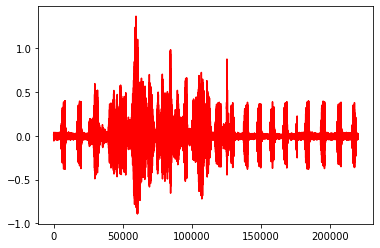

In [ ]:
plt.plot(audio, color='red')

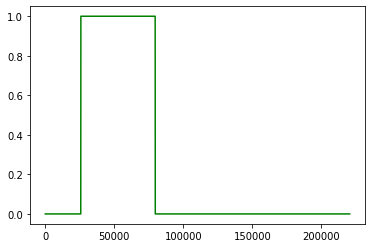

In [ ]:
plt.plot(y, color="green")

In [ ]:
def split_audio(filename, dest, time, volume=1):
  track, sr = librosa.load(filename)
  for id, start in enumerate(range(0, len(track), time*sr)):
    if start + (sr*2) > len(track):
      break 
    audio = track[start:start+(sr*2)] * volume
    sf.write(f'{dest}/{id}.wav', audio, sr)

In [ ]:
split_audio('./1.wav', './raw_data/speaker/narendra modi', 2, 5)

In [ ]:
split_audio('./2.wav', './raw_data/speaker/tom scott', 2)

In [ ]:
split_audio('./3.wav', './raw_data/speaker/mark brown', 2)

0.88309336 -0.85208225


In [ ]:
!pip install tqdm

In [29]:
!du -sh ./dataset/narendra\ modi

2.1G	./dataset/narendra modi


In [61]:
!zip -r ./train.zip ./dataset/narendra\ modi

  adding: dataset/narendra modi/ (stored 0%)
  adding: dataset/narendra modi/1822.json (deflated 100%)
  adding: dataset/narendra modi/1737.wav (deflated 24%)
  adding: dataset/narendra modi/1892.wav (deflated 16%)
  adding: dataset/narendra modi/608.json (deflated 100%)
  adding: dataset/narendra modi/40.wav (deflated 14%)
  adding: dataset/narendra modi/1540.wav (deflated 16%)
  adding: dataset/narendra modi/1311.json (deflated 100%)
  adding: dataset/narendra modi/1177.json (deflated 100%)
  adding: dataset/narendra modi/219.wav (deflated 7%)
  adding: dataset/narendra modi/1779.json (deflated 100%)
  adding: dataset/narendra modi/21.wav (deflated 9%)
  adding: dataset/narendra modi/1994.json (deflated 100%)
  adding: dataset/narendra modi/1216.wav (deflated 14%)
  adding: dataset/narendra modi/922.wav (deflated 20%)
  adding: dataset/narendra modi/1842.wav (deflated 13%)
  adding: dataset/narendra modi/1583.json (deflated 100%)
  adding: dataset/narendra modi/869.json (deflated 100

In [39]:
!ls -all |grep *.zip

^C


In [ ]:
!ls -all -h

In [62]:
!cp ./train.zip ./drive/MyDrive/

In [ ]:
os.listdir('./fold1')

In [ ]:
!zip -r ./test.zip ./dataset/test

In [75]:
!cp test.zip ./drive/MyDrive/

In [52]:
!du -sh *.zip

710M	dataset.zip
177M	train.zip
5.7G	urbansound8k.zip


In [71]:
!ls -h -all ./dataset/narendra\ modi | grep *.csv

In [73]:
!cd /content/dataset && find . -type f | awk -F. '!a[$NF]++{print $NF}'

json
wav
csv
